In [1]:
import pandas as pd

df = pd.read_csv('Crop_recommendation.csv')

In [2]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
df['label'] = df['label'].astype(str)

In [4]:
df['label'].value_counts()

rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: label, dtype: int64

In [5]:
df['label'].nunique()

15

In [6]:
df['label'] = df['label'].str.strip()

In [7]:
df['label'] = df['label'].astype(str).str.lower()


# Check number of unique classes in target variable
print("Unique values in target variable:", df['label'].unique())
print("Number of classes:", len(df['label'].unique()))

# Check class distribution
print(df['label'].value_counts())

Unique values in target variable: ['rice' 'maize' 'soyabeans' 'beans' 'peas' 'groundnuts' 'cowpeas' 'banana'
 'mango' 'grapes' 'watermelon' 'apple' 'orange' 'cotton' 'coffee']
Number of classes: 15
rice          139
soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: label, dtype: int64


In [8]:
X = df[['N', 'P', 'K', 'temperature', 'humidity','ph', 'rainfall']]

In [9]:
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/pauviramontes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
import numpy as np

unique_values = np.unique(df['label'])
num_classes = len(unique_values)

print("Unique values in target variable:", unique_values)
print("Number of classes:", num_classes)


Unique values in target variable: ['apple' 'banana' 'beans' 'coffee' 'cotton' 'cowpeas' 'grapes'
 'groundnuts' 'maize' 'mango' 'orange' 'peas' 'rice' 'soyabeans'
 'watermelon']
Number of classes: 15


In [13]:
y_pred = logreg.predict(X_test)

In [14]:
print(y_pred)


['cowpeas' 'maize' 'maize' 'beans' 'cotton' 'coffee' 'cowpeas' 'banana'
 'coffee' 'banana' 'orange' 'peas' 'peas' 'soyabeans' 'orange' 'cotton'
 'mango' 'orange' 'beans' 'peas' 'maize' 'rice' 'banana' 'rice' 'rice'
 'grapes' 'apple' 'banana' 'peas' 'groundnuts' 'maize' 'beans' 'orange'
 'apple' 'grapes' 'groundnuts' 'coffee' 'banana' 'peas' 'groundnuts'
 'soyabeans' 'mango' 'beans' 'mango' 'cowpeas' 'grapes' 'watermelon'
 'apple' 'grapes' 'rice' 'rice' 'cowpeas' 'rice' 'beans' 'coffee' 'grapes'
 'soyabeans' 'cowpeas' 'soyabeans' 'banana' 'groundnuts' 'beans' 'coffee'
 'groundnuts' 'mango' 'banana' 'cotton' 'rice' 'cotton' 'peas' 'cowpeas'
 'peas' 'peas' 'rice' 'beans' 'coffee' 'beans' 'peas' 'watermelon'
 'cotton' 'soyabeans' 'rice' 'cotton' 'cotton' 'orange' 'soyabeans'
 'mango' 'rice' 'beans' 'rice' 'orange' 'cotton' 'cowpeas' 'mango'
 'watermelon' 'soyabeans' 'watermelon' 'peas' 'cotton' 'groundnuts'
 'beans' 'cotton' 'grapes' 'banana' 'soyabeans' 'peas' 'soyabeans'
 'soyabeans' 'ap

In [15]:
import pandas as pd

# create a DataFrame with the test data and the predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# display the first 10 rows of the results
print(results.head(10))

       Actual Predicted
618   cowpeas   cowpeas
115     maize     maize
135     maize     maize
350     beans     beans
1395   cotton    cotton
1447   coffee    coffee
669   cowpeas   cowpeas
1685   banana    banana
1448   coffee    coffee
772    banana    banana


In [16]:
accuracy = logreg.score(X_test, y_test)
print("The model's accuracy is:", accuracy)

The model's accuracy is: 0.9882352941176471


In [26]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are the true labels and predicted labels respectively
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 score: {f1:.2f}")


F1 score: 0.99


In [27]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        25
       beans       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        18
      cotton       0.92      0.96      0.94        23
     cowpeas       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      0.96      0.98        25
       maize       0.95      0.91      0.93        22
       mango       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        16
        peas       0.96      1.00      0.98        25
        rice       1.00      1.00      1.00        23
   soyabeans       1.00      1.00      1.00        25
  watermelon       1.00      1.00      1.00        18

    accuracy                           0.99       340
   macro avg       0.99      0.99      0.99       340
weighted avg       0.99   

In [19]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


Confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  1  0  0  0]
 [ 0  0  0  0  2  0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18]]


<AxesSubplot:>

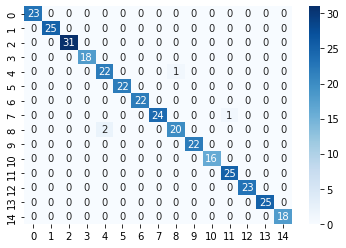

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with colors
sns.heatmap(cm, annot=True, cmap='Blues')


In [21]:
import pickle

# Save model to file
Pkl_Filename = "LR.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [22]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LG_Model = pickle.load(file)

Pickled_LG_Model


LogisticRegression()

In [23]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LG_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  


Test score: 98.82 %


In [24]:
print(y_pred)

['cowpeas' 'maize' 'maize' 'beans' 'cotton' 'coffee' 'cowpeas' 'banana'
 'coffee' 'banana' 'orange' 'peas' 'peas' 'soyabeans' 'orange' 'cotton'
 'mango' 'orange' 'beans' 'peas' 'maize' 'rice' 'banana' 'rice' 'rice'
 'grapes' 'apple' 'banana' 'peas' 'groundnuts' 'maize' 'beans' 'orange'
 'apple' 'grapes' 'groundnuts' 'coffee' 'banana' 'peas' 'groundnuts'
 'soyabeans' 'mango' 'beans' 'mango' 'cowpeas' 'grapes' 'watermelon'
 'apple' 'grapes' 'rice' 'rice' 'cowpeas' 'rice' 'beans' 'coffee' 'grapes'
 'soyabeans' 'cowpeas' 'soyabeans' 'banana' 'groundnuts' 'beans' 'coffee'
 'groundnuts' 'mango' 'banana' 'cotton' 'rice' 'cotton' 'peas' 'cowpeas'
 'peas' 'peas' 'rice' 'beans' 'coffee' 'beans' 'peas' 'watermelon'
 'cotton' 'soyabeans' 'rice' 'cotton' 'cotton' 'orange' 'soyabeans'
 'mango' 'rice' 'beans' 'rice' 'orange' 'cotton' 'cowpeas' 'mango'
 'watermelon' 'soyabeans' 'watermelon' 'peas' 'cotton' 'groundnuts'
 'beans' 'cotton' 'grapes' 'banana' 'soyabeans' 'peas' 'soyabeans'
 'soyabeans' 'ap